### <i>Predicting Energy Consumption in Hospitals using Machine Learning: A Data-Driven Approach to Energy Efficiency </i>
### <i> Dataset Link --> https://www.kaggle.com/datasets/ziya07/hospital-energy-saving-system-dataset </i>
### <i> Import Library Files </i>

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)  # Ignores only UserWarnings
warnings.filterwarnings("ignore", category=FutureWarning)  # Ignores FutureWarnings


### <i> Load The Dataset </i>

In [4]:
df = pd.read_csv("hospital_communication_energy_system.csv")
df

Timestamp Patient ID  Temperature (°C)  Humidity (%)  \
0     2025-01-01 00:00:00      P0001         35.959197     53.116400   
1     2025-01-01 00:05:00      P0002         36.591216     55.613547   
2     2025-01-01 00:10:00      P0003         36.462011     58.424429   
3     2025-01-01 00:15:00      P0004         36.410249     49.649295   
4     2025-01-01 00:20:00      P0005         36.258128     42.872100   
...                   ...        ...               ...           ...   
9995  2025-02-04 16:55:00      P9996         36.486313     52.617065   
9996  2025-02-04 17:00:00      P9997         37.011693     65.133106   
9997  2025-02-04 17:05:00      P9998         36.407790     54.272084   
9998  2025-02-04 17:10:00      P9999         36.757020     57.859780   
9999  2025-02-04 17:15:00     P10000         37.052674     47.213165   

      Oxygen Level (%)  Heart Rate (bpm) Blood Pressure (mmHg)  \
0            98.863328                76             (111, 84)   
1            97.408234                98             (119, 79)   
2            97.106903                93             (132, 79)   
3            96.425162                69             (120, 75)   
4            97.484515                78             (122, 77)   
...                ...               ...                   ...   
9995         96.935186                60             (119, 72)   
9996         96.742336                96             (137, 84)   
9997         91.311788                60             (130, 75)   
9998         94.570360                78             (136, 88)   
9999         97.319195                90             (136, 90)   

      Energy Consumption (kWh) Energy Source  Renewable Energy Usage (%)  ...  \
0                    16.747023          Grid                   52.755948  ...   
1                    18.816142          Wind                   69.839095  ...   
2                     9.902197          Wind                   66.295345  ...   
3                     9.445146          Grid                   77.151743  ...   
4                    18.928228         Solar                   72.641814  ...   
...                        ...           ...                         ...  ...   
9995                 11.576610          Wind                   65.883865  ...   
9996                 11.340704         Solar                   87.100561  ...   
9997                 10.477275          Grid                   62.006824  ...   
9998                 15.390700          Wind                   61.532101  ...   
9999                 14.656410          Grid                   64.682498  ...   

      Room Humidity (%)  HVAC Mode  HVAC Efficiency (%)  \
0             33.705483    Heating            92.930041   
1             50.419144    Heating            91.987563   
2             63.809061    Cooling            88.873706   
3             52.816270    Heating            84.876137   
4             34.510662    Heating            81.013523   
...                 ...        ...                  ...   
9995          38.895050    Cooling            93.624983   
9996          49.479635    Heating            93.742358   
9997          48.674210    Cooling            85.684270   
9998          54.684736    Cooling            83.681221   
9999          60.148418    Cooling            87.677778   

      Outdoor Temperature (°C)  Outdoor Humidity (%)  Day of the Week  Season  \
0                    18.903246             58.295437                2    Fall   
1                    33.844832             50.550620                2  Summer   
2                    19.535191             50.933567                2    Fall   
3                    24.507892             66.980780                2  Winter   
4                    23.751179             43.990726                2  Spring   
...                        ...                   ...              ...     ...   
9995                 21.574652             61.082716                1  Spring   
9996                 23.1888

### <i> Dataset Overview </i>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Timestamp                            10000 non-null  object 
 1   Patient ID                           10000 non-null  object 
 2   Temperature (°C)                     10000 non-null  float64
 3   Humidity (%)                         10000 non-null  float64
 4   Oxygen Level (%)                     10000 non-null  float64
 5   Heart Rate (bpm)                     10000 non-null  int64  
 6   Blood Pressure (mmHg)                10000 non-null  object 
 7   Energy Consumption (kWh)             10000 non-null  float64
 8   Energy Source                        10000 non-null  object 
 9   Renewable Energy Usage (%)           10000 non-null  float64
 10  HVAC Power Usage (kWh)               10000 non-null  float64
 11  Lighting Power Usage (kWh)   

In [7]:
df.describe()

Temperature (°C)  Humidity (%)  Oxygen Level (%)  Heart Rate (bpm)  \
count      10000.000000  10000.000000      10000.000000      10000.000000   
mean          36.502086     55.093366         96.011950         79.413600   
std            0.505308     10.037706          2.024329         11.543824   
min           34.502865     16.430411         88.863731         60.000000   
25%           36.160027     48.236511         94.637191         69.750000   
50%           36.499497     55.027548         96.015319         79.000000   
75%           36.839113     61.791380         97.384114         89.000000   
max           38.158587     92.000546        103.033181         99.000000   

       Energy Consumption (kWh)  Renewable Energy Usage (%)  \
count              10000.000000                10000.000000   
mean                  15.021783                   75.063087   
std                    2.999066                   14.526648   
min                    3.679740                   50.012810   
25%                   13.008793                   62.299134   
50%                   15.009721                   74.976906   
75%                   17.021608                   87.742552   
max                   29.234176                   99.997287   

       HVAC Power Usage (kWh)  Lighting Power Usage (kWh)  \
count            10000.000000                10000.000000   
mean                 4.988765                    1.999587   
std                  0.996217                    0.500709   
min                  1.260998                    0.144631   
25%                  4.326109                    1.667338   
50%                  4.995787                    2.000089   
75%                  5.650405                    2.331895   
max                  8.686964                    4.220117   

       Medical Equipment Power Usage (kWh)  Total Power Usage (kWh)  \
count                         10000.000000             10000.000000   
mean                              3.011984                10.000335   
std                               0.790769                 1.368253   
min                              -0.170565                 5.185185   
25%                               2.485275                 9.075309   
50%                               3.017273                 9.996511   
75%                               3.549319                10.931366   
max                               6.197619                14.805275   

       Room Temperature (°C)  Room Humidity (%)  HVAC Efficiency (%)  \
count           10000.000000       10000.000000         10000.000000   
mean               21.997973          49.867221            87.463638   
std                 2.017490          10.000224             4.314194   
min                10.941437          15.636957            80.001309   
25%                20.665378          43.074265            83.711865   
50%                21.998827          49.803434            87.461619   
75%                23.334843          56.517360            91.124894   
max                29.082269          88.179295            94.999314   

       Outdoor Temperature (°C)  Outdoor Humidity (%)  Day of the Week  \
count              10000.000000          10000.000000     10000.000000   
mean                  25.063483             59.887101         3.016000   
std                    5.099444              9.925944         2.000036   
min                    6.119398             25.122396         0.000000   
25%                   21.657858             53.179686         1.000000   
50%                   25.060064             59.929929         3.000000   
75%                   28.482223             66.679532         5.000000   
max                   43.773135            101.457136         6.000000   

       Energy Saving Mode  System Health Check  
count         10000.00000         10000.000000  
mean              0.49770             0.506400  
std               0.50002             0.499984  
min               0.00000             0.000

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())
# Convert 'Timestamp' to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract additional time-based features (optional)
df['Hour'] = df['Timestamp'].dt.hour
df['Month'] = df['Timestamp'].dt.month




Missing values:
Timestamp                              0
Patient ID                             0
Temperature (°C)                       0
Humidity (%)                           0
Oxygen Level (%)                       0
Heart Rate (bpm)                       0
Blood Pressure (mmHg)                  0
Energy Consumption (kWh)               0
Energy Source                          0
Renewable Energy Usage (%)             0
HVAC Power Usage (kWh)                 0
Lighting Power Usage (kWh)             0
Medical Equipment Power Usage (kWh)    0
Total Power Usage (kWh)                0
Room Temperature (°C)                  0
Room Humidity (%)                      0
HVAC Mode                              0
HVAC Efficiency (%)                    0
Outdoor Temperature (°C)               0
Outdoor Humidity (%)                   0
Day of the Week                        0
Season                                 0
Energy Saving Mode                     0
System Health Check                    0

### <i> Expolatory Data Analysis And Data Visulization </i>

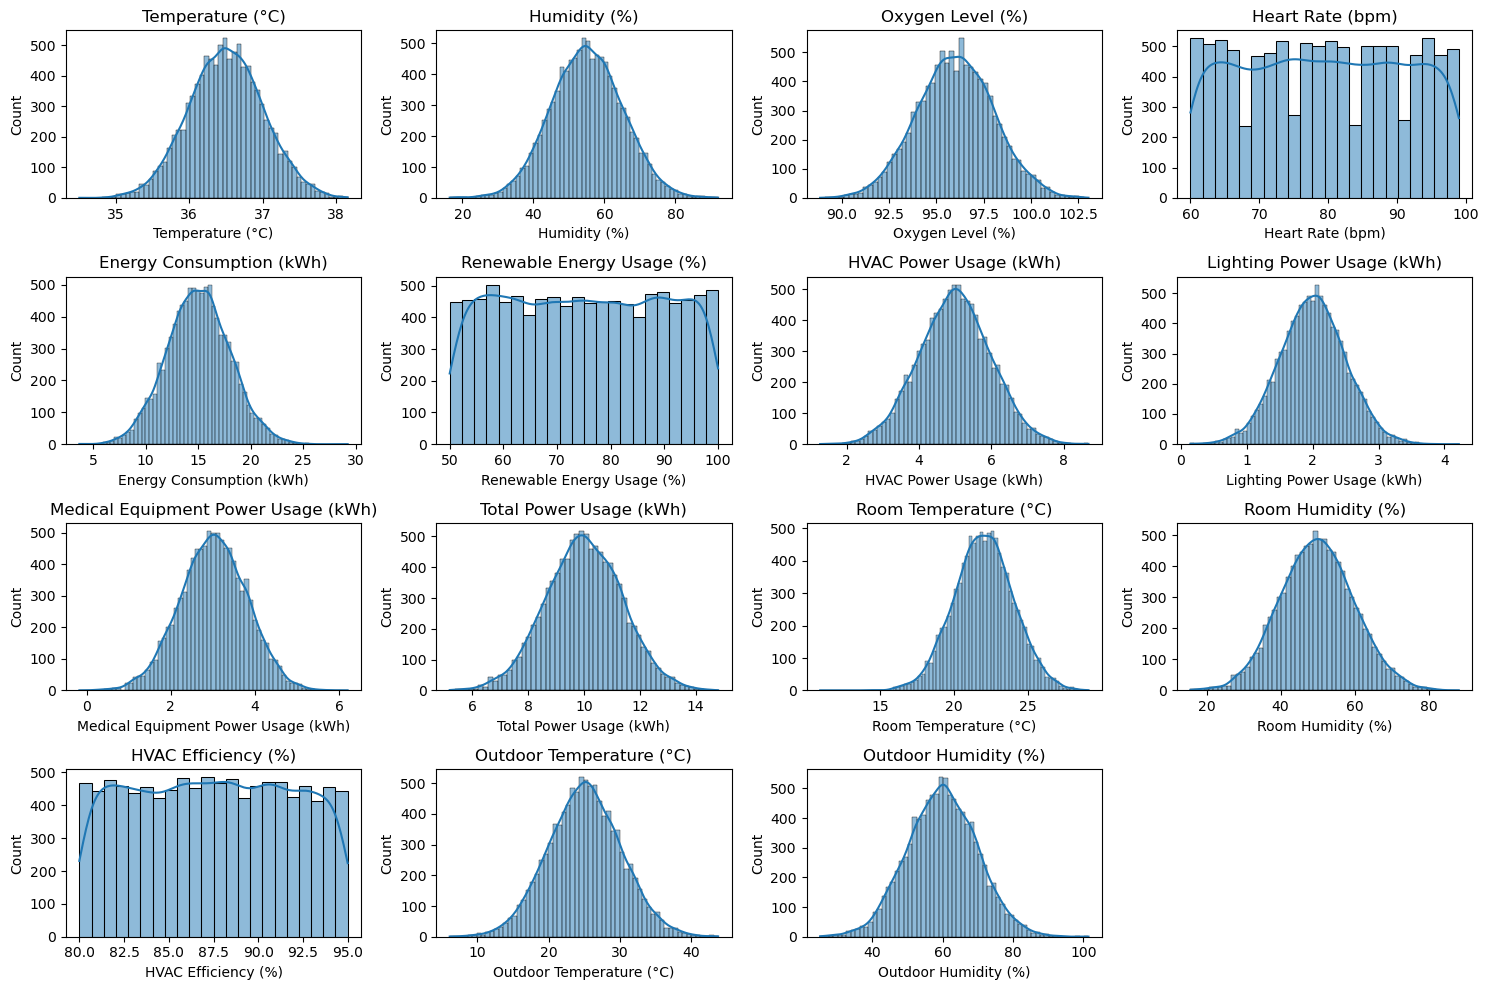

In [10]:
# Visualize distributions of numerical columns
numerical_columns = ['Temperature (°C)', 'Humidity (%)', 'Oxygen Level (%)', 'Heart Rate (bpm)', 
                     'Energy Consumption (kWh)', 'Renewable Energy Usage (%)', 
                     'HVAC Power Usage (kWh)', 'Lighting Power Usage (kWh)', 
                     'Medical Equipment Power Usage (kWh)', 'Total Power Usage (kWh)', 
                     'Room Temperature (°C)', 'Room Humidity (%)', 'HVAC Efficiency (%)', 
                     'Outdoor Temperature (°C)', 'Outdoor Humidity (%)']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()



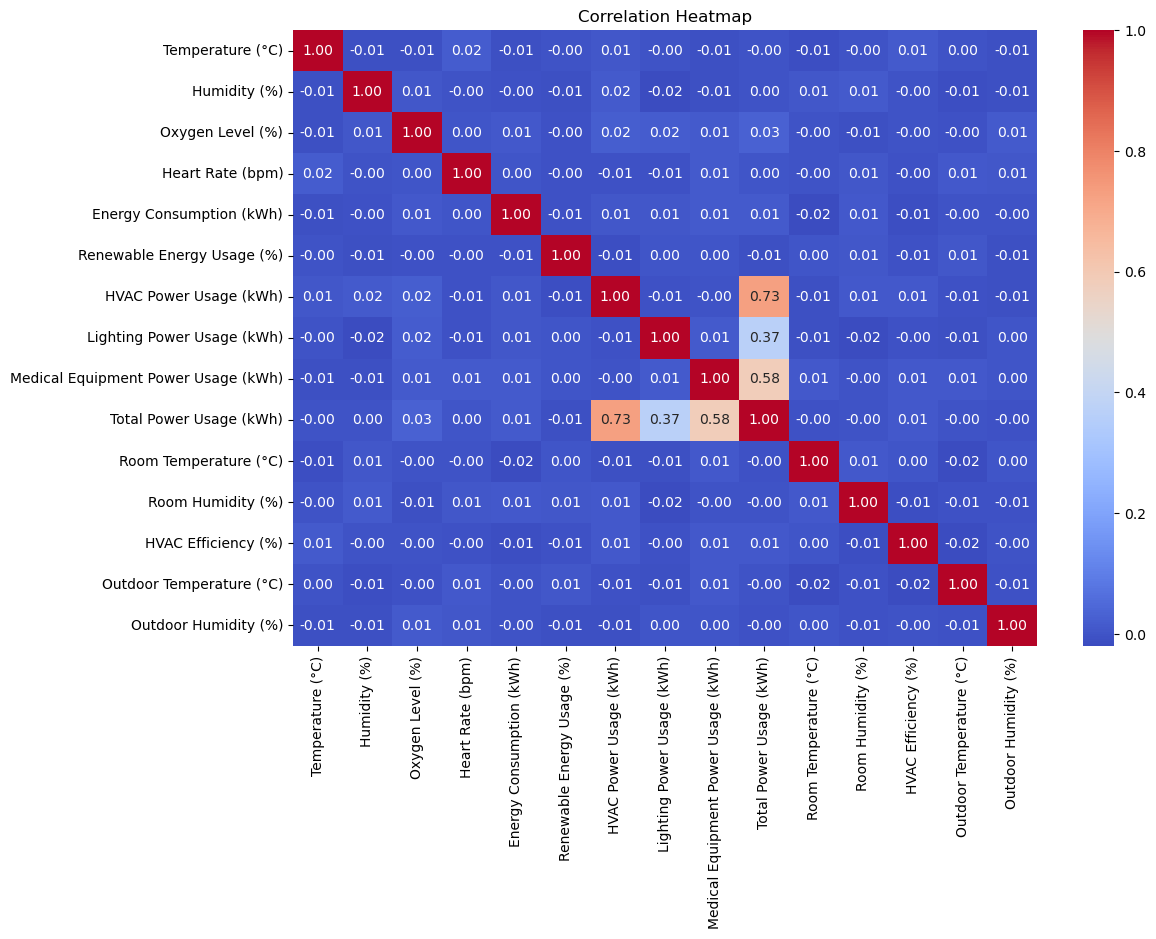

In [11]:
# Visualize correlations between numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


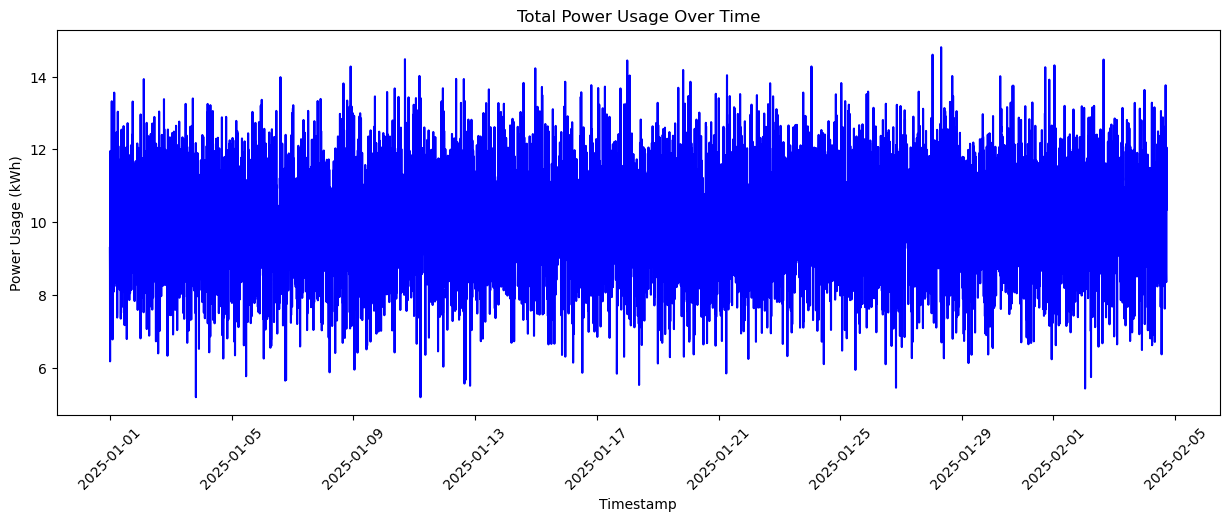

In [12]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='Timestamp', y='Total Power Usage (kWh)', color='blue')
plt.title('Total Power Usage Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Power Usage (kWh)')
plt.xticks(rotation=45)
plt.show()


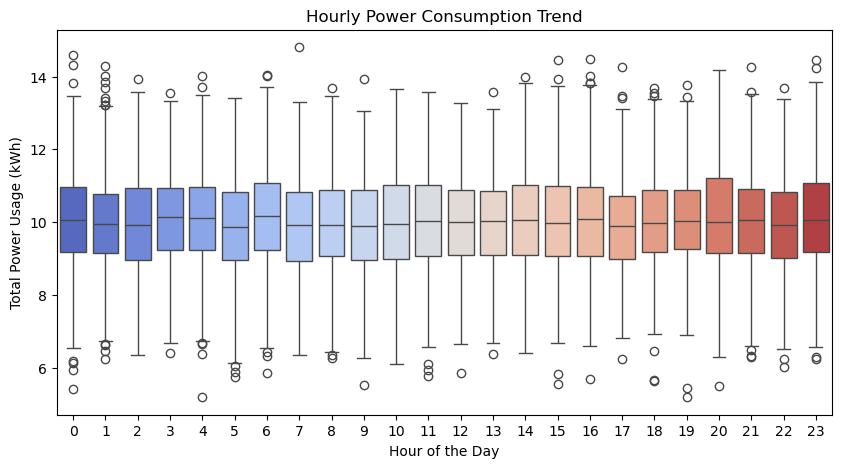

In [13]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Hour', y='Total Power Usage (kWh)', palette='coolwarm')
plt.title('Hourly Power Consumption Trend')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Power Usage (kWh)')
plt.show()


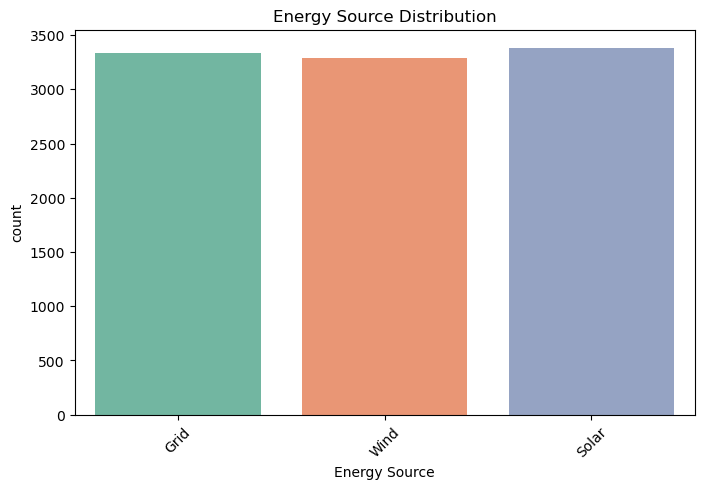

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Energy Source', palette='Set2')
plt.title('Energy Source Distribution')
plt.xticks(rotation=45)
plt.show()


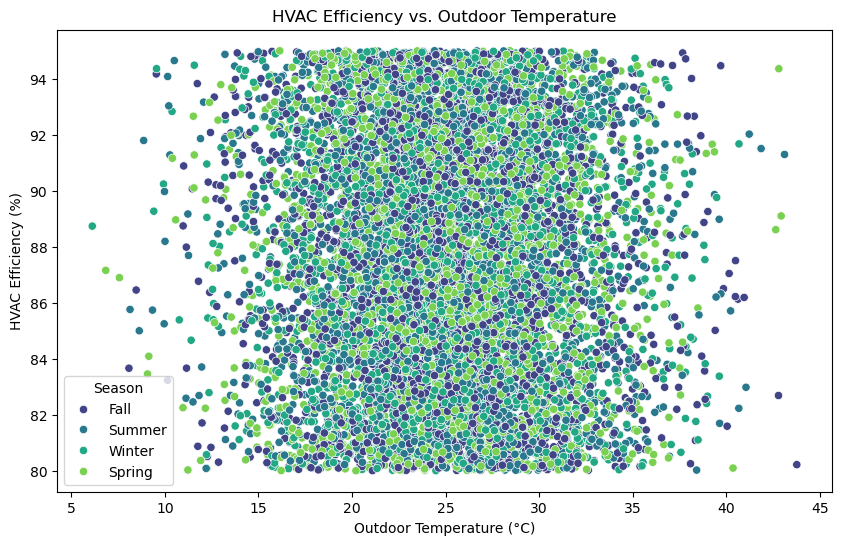

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Outdoor Temperature (°C)', y='HVAC Efficiency (%)', hue='Season', palette='viridis')
plt.title('HVAC Efficiency vs. Outdoor Temperature')
plt.xlabel('Outdoor Temperature (°C)')
plt.ylabel('HVAC Efficiency (%)')
plt.show()


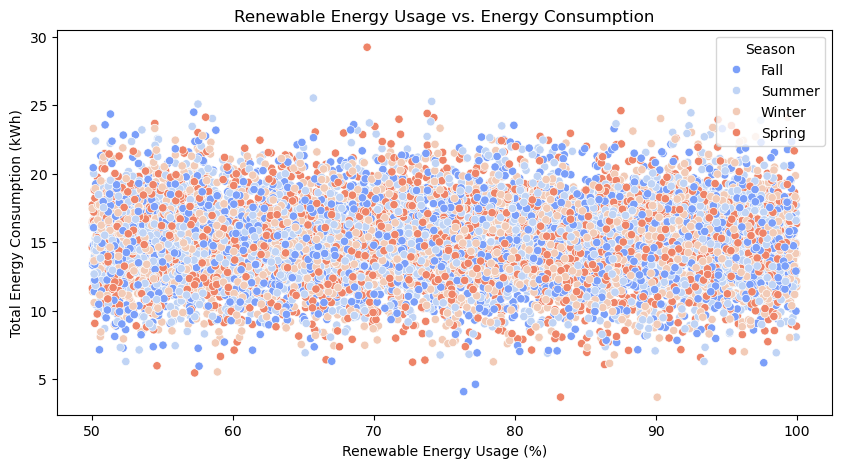

In [16]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Renewable Energy Usage (%)', y='Energy Consumption (kWh)', hue='Season', palette='coolwarm')
plt.title('Renewable Energy Usage vs. Energy Consumption')
plt.xlabel('Renewable Energy Usage (%)')
plt.ylabel('Total Energy Consumption (kWh)')
plt.show()


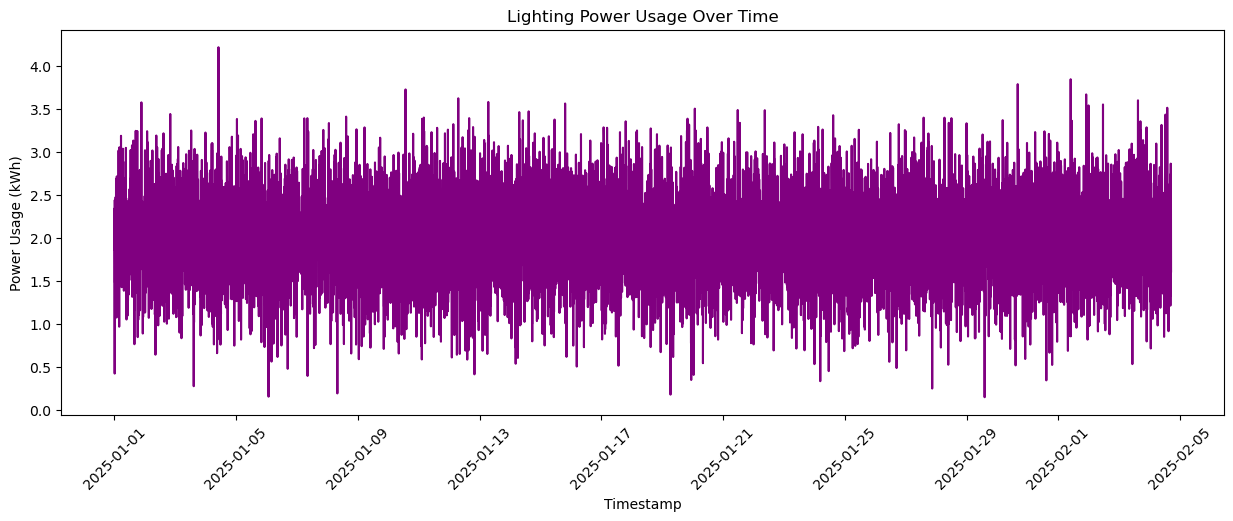

In [17]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='Timestamp', y='Lighting Power Usage (kWh)', color='purple')
plt.title('Lighting Power Usage Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Power Usage (kWh)')
plt.xticks(rotation=45)
plt.show()


In [18]:
from plotly import graph_objects as go

labels = ["Total Energy", "Renewable Energy", "Non-Renewable Energy", 
          "HVAC", "Lighting", "Medical Equipment", "Other Usage"]

# Define sources and targets for Sankey Diagram
source = [0, 0, 1, 1, 2, 2]  
target = [1, 2, 3, 4, 5, 6]  
values = [df['Renewable Energy Usage (%)'].mean(), 100 - df['Renewable Energy Usage (%)'].mean(),
          df['HVAC Power Usage (kWh)'].mean(), df['Lighting Power Usage (kWh)'].mean(),
          df['Medical Equipment Power Usage (kWh)'].mean(), df['Total Power Usage (kWh)'].mean() - 
          (df['HVAC Power Usage (kWh)'].mean() + df['Lighting Power Usage (kWh)'].mean() + df['Medical Equipment Power Usage (kWh)'].mean())]

fig = go.Figure(go.Sankey(
    node=dict(pad=15, thickness=20, label=labels),
    link=dict(source=source, target=target, value=values)
))

fig.update_layout(title_text="Energy Flow Analysis", font_size=10)
fig.show()



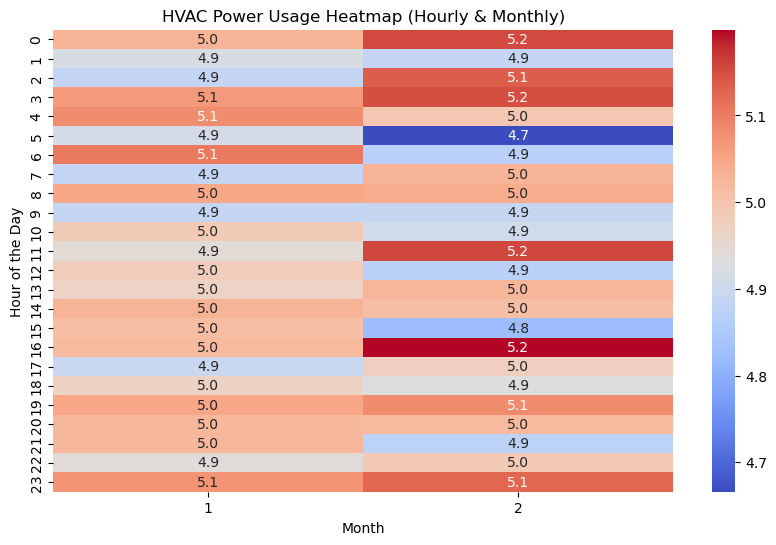

In [19]:
pivot_table = df.pivot_table(values='HVAC Power Usage (kWh)', index='Hour', columns='Month', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".1f")
plt.title("HVAC Power Usage Heatmap (Hourly & Monthly)")
plt.xlabel("Month")
plt.ylabel("Hour of the Day")
plt.show()


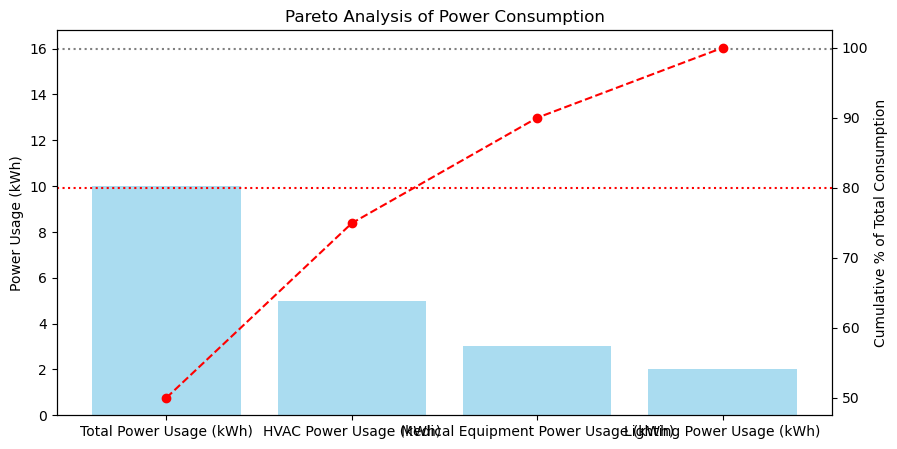

In [20]:
power_features = ['HVAC Power Usage (kWh)', 'Lighting Power Usage (kWh)', 'Medical Equipment Power Usage (kWh)', 'Total Power Usage (kWh)']
power_usage = df[power_features].mean().sort_values(ascending=False)

cumulative_percentage = power_usage.cumsum() / power_usage.sum() * 100

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(power_usage.index, power_usage, color='skyblue', alpha=0.7)
ax2 = ax.twinx()
ax2.plot(power_usage.index, cumulative_percentage, color='red', marker="o", linestyle="dashed")
ax.axhline(y=power_usage.sum() * 0.8, color='gray', linestyle='dotted')
ax2.axhline(y=80, color='red', linestyle='dotted')

ax.set_ylabel("Power Usage (kWh)")
ax2.set_ylabel("Cumulative % of Total Consumption")
ax.set_title("Pareto Analysis of Power Consumption")
plt.xticks(rotation=45)
plt.show()


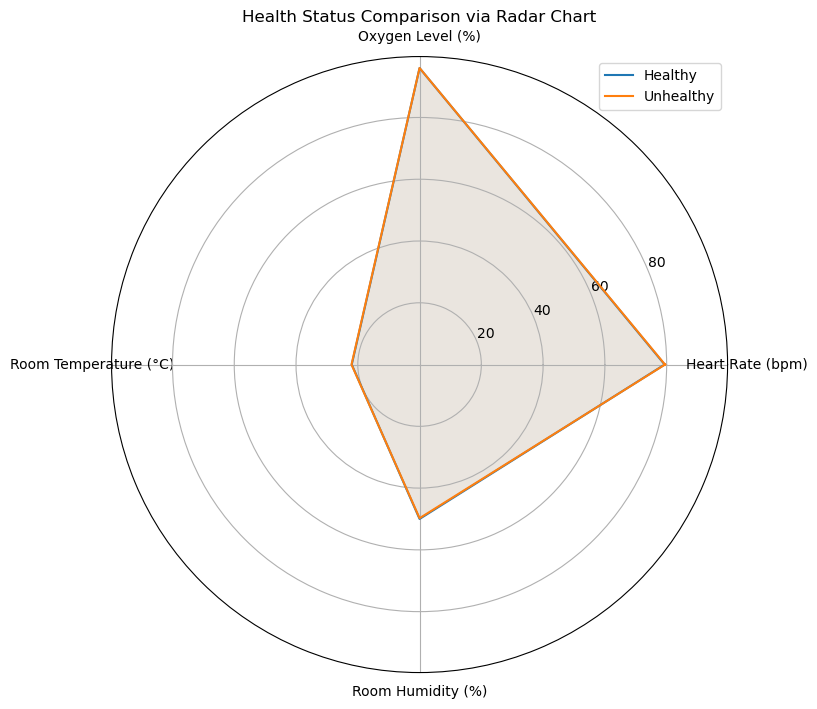

In [21]:
from math import pi

categories = ['Heart Rate (bpm)', 'Oxygen Level (%)', 'Room Temperature (°C)', 'Room Humidity (%)']
health_groups = df.groupby('AI Predicted Health Status')[categories].mean()

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for i, (label, row) in enumerate(health_groups.iterrows()):
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, label=label)
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_title("Health Status Comparison via Radar Chart")
ax.legend()
plt.show()


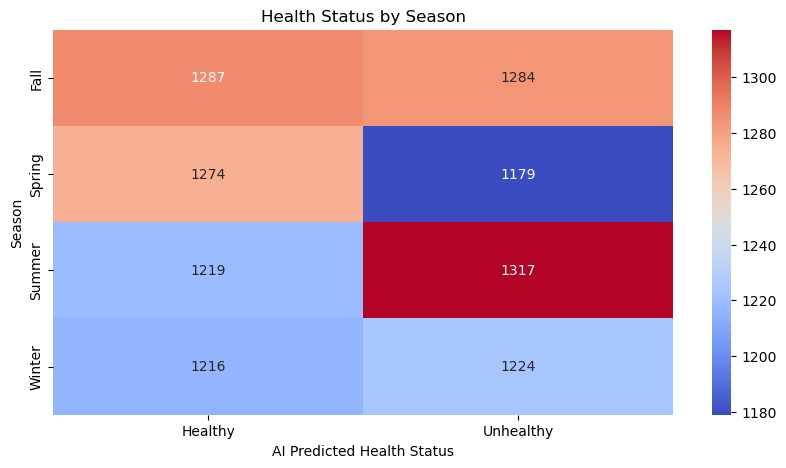

In [22]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.pivot_table(index='Season', columns='AI Predicted Health Status', aggfunc='size', fill_value=0), annot=True, cmap="coolwarm", fmt="d")
plt.title("Health Status by Season")
plt.show()


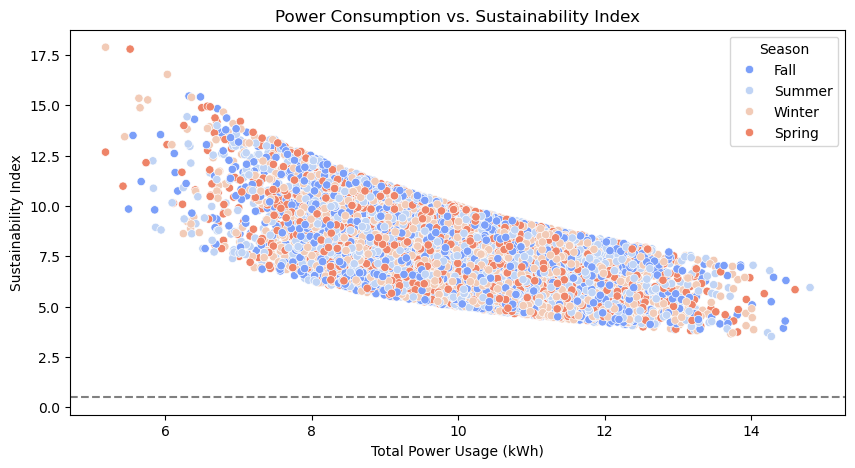

In [23]:
df['Sustainability Index'] = df['Renewable Energy Usage (%)'] / df['Total Power Usage (kWh)']

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Total Power Usage (kWh)', y='Sustainability Index', hue='Season', palette='coolwarm')
plt.axhline(y=0.5, color='gray', linestyle='dashed')
plt.title('Power Consumption vs. Sustainability Index')
plt.xlabel('Total Power Usage (kWh)')
plt.ylabel('Sustainability Index')
plt.show()


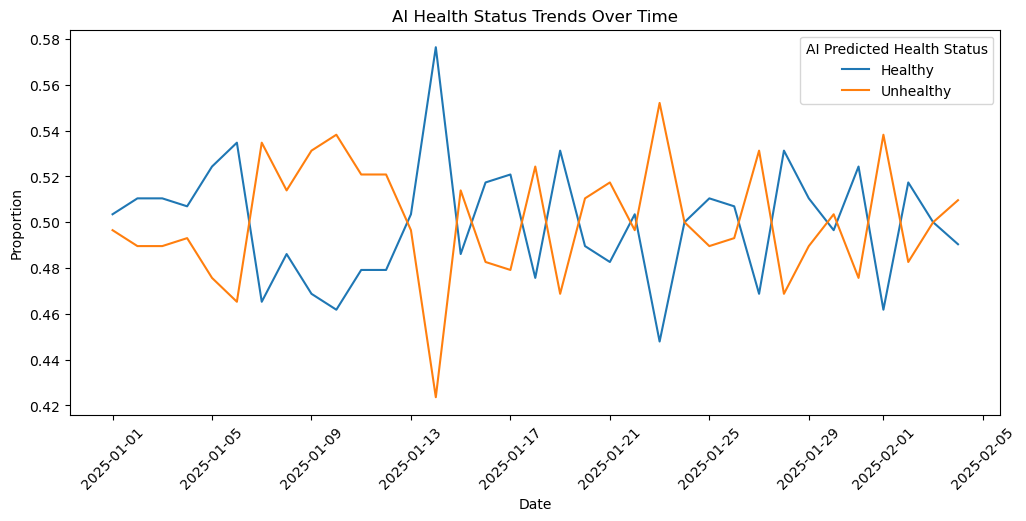

In [24]:
plt.figure(figsize=(12, 5))
df['Date'] = df['Timestamp'].dt.date
sns.lineplot(data=df.groupby('Date')['AI Predicted Health Status'].value_counts(normalize=True).unstack(), dashes=False)
plt.title("AI Health Status Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.show()


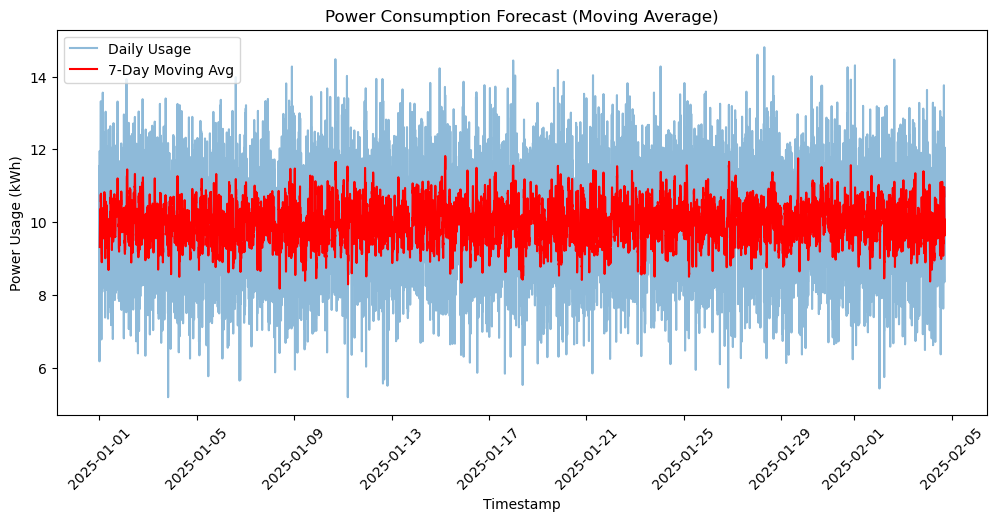

In [25]:
df['Rolling_Mean'] = df['Total Power Usage (kWh)'].rolling(window=7).mean()

plt.figure(figsize=(12, 5))
plt.plot(df['Timestamp'], df['Total Power Usage (kWh)'], alpha=0.5, label='Daily Usage')
plt.plot(df['Timestamp'], df['Rolling_Mean'], color='red', label='7-Day Moving Avg')
plt.title('Power Consumption Forecast (Moving Average)')
plt.xlabel('Timestamp')
plt.ylabel('Power Usage (kWh)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


### <i> Data Preprocessing </i>

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract useful datetime features
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Weekday'] = df['Timestamp'].dt.weekday

# Drop 'Timestamp' and any unique identifier columns
df.drop(columns=['Timestamp', 'Patient_ID'], errors='ignore', inplace=True)  # Adjust 'Patient_ID' if needed

# Handling missing values
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill missing numerical values
df.fillna(df.mode().iloc[0], inplace=True)  # Fill missing categorical values

# Encode categorical target variable
label_encoder = LabelEncoder()
df['AI Predicted Health Status'] = label_encoder.fit_transform(df['AI Predicted Health Status'])

# Identify categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Apply Label Encoding to categorical features
for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Normalize numerical features
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Define features and target
X = df.drop(columns=['AI Predicted Health Status'])
y = df['AI Predicted Health Status']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### <i> Modeling </i>
### <i> Random Forest Classifier </i>

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print("🎯 Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


🎯 Random Forest Accuracy: 0.5035
              precision    recall  f1-score   support

           0       0.51      0.52      0.52      1022
           1       0.49      0.49      0.49       978

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000

Confusion Matrix:
 [[528 494]
 [499 479]]


### <i> XGboost </i>

In [31]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print("🎯 XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


🎯 XGBoost Accuracy: 0.511
              precision    recall  f1-score   support

           0       0.52      0.50      0.51      1022
           1       0.50      0.52      0.51       978

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000

Confusion Matrix:
 [[509 513]
 [465 513]]


### <i> ANN </i>

In [33]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(len(np.unique(y)), activation='softmax')  # Multi-class classification
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

y_pred = np.argmax(model.predict(X_test), axis=1)

print("🎯 Neural Network Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4940 - loss: 40.4461 - val_accuracy: 0.5105 - val_loss: 4.0745
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4927 - loss: 4.9164 - val_accuracy: 0.5105 - val_loss: 7.0820
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5102 - loss: 4.4673 - val_accuracy: 0.4865 - val_loss: 3.8290
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4979 - loss: 4.1977 - val_accuracy: 0.4885 - val_loss: 1.2015
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5098 - loss: 3.3961 - val_accuracy: 0.5095 - val_loss: 4.1839
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4987 - loss: 3.5747 - val_accuracy: 0.4870 - val_loss: 1.9695
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4978 - loss: 3.0490 - val_accuracy: 0.4910 - val_loss: 1.0055
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5064 - loss: 2.8298 - val_accuracy: 0

### <i> Feature Importance Of Randon Forest And XGboost </i>

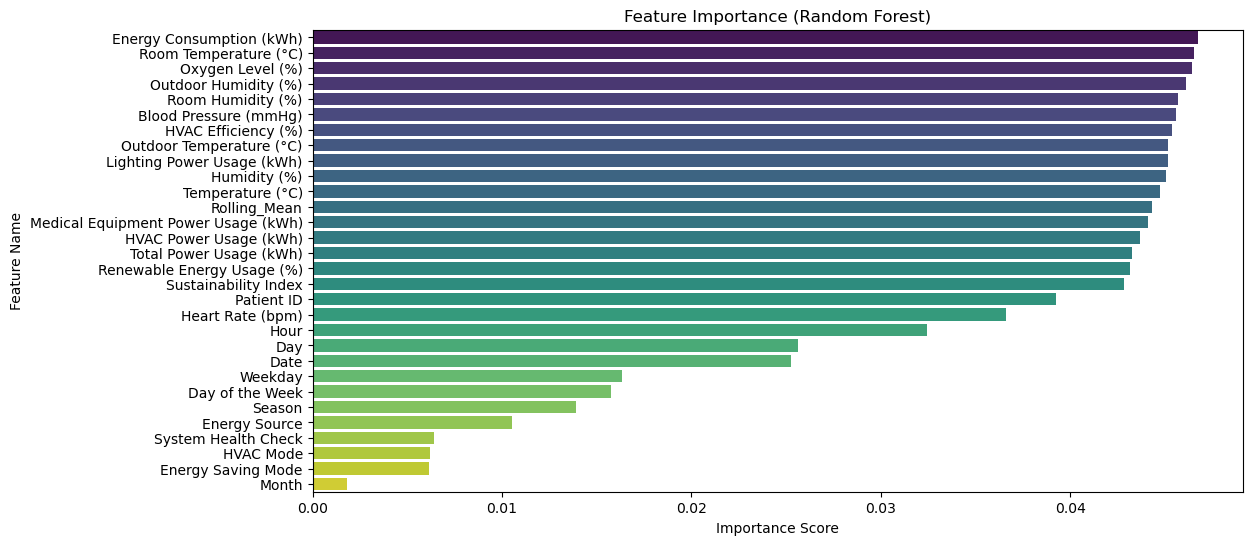

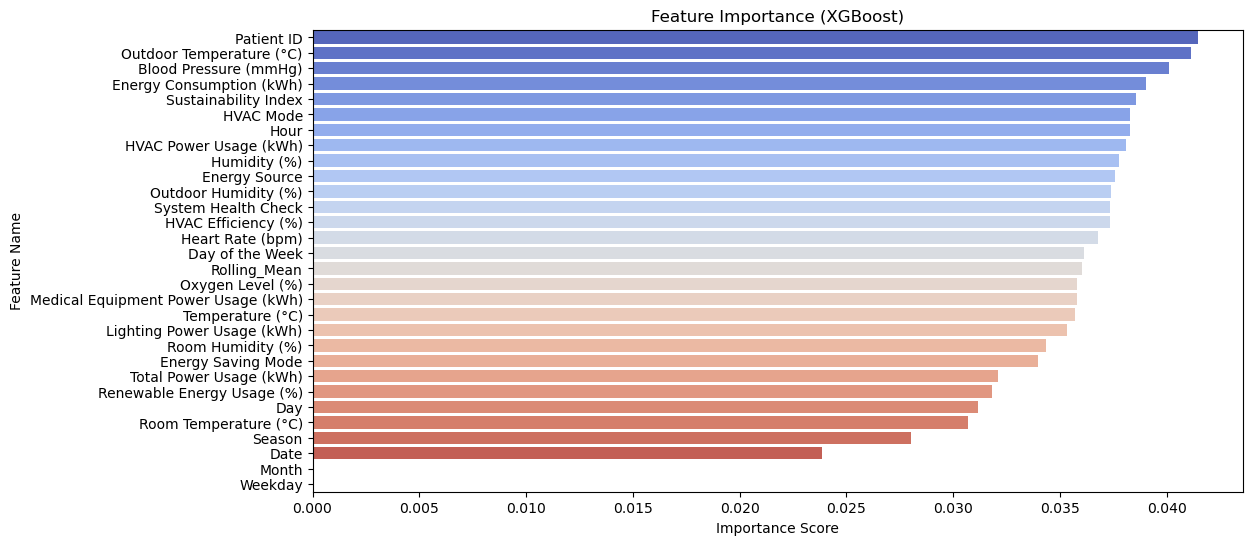

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Feature Importance for Random Forest
feature_importance_rf = rf_model.feature_importances_
feature_names = X.columns

# Sort and plot
sorted_idx = np.argsort(feature_importance_rf)[::-1]
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_rf[sorted_idx], y=np.array(feature_names)[sorted_idx], palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()

# Feature Importance for XGBoost
feature_importance_xgb = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importance_xgb)[::-1]
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_xgb[sorted_idx], y=np.array(feature_names)[sorted_idx], palette="coolwarm")
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()


### <i> Confusion Matrix Of Random Forest And XGBoost </i>

<Figure size 600x400 with 0 Axes>

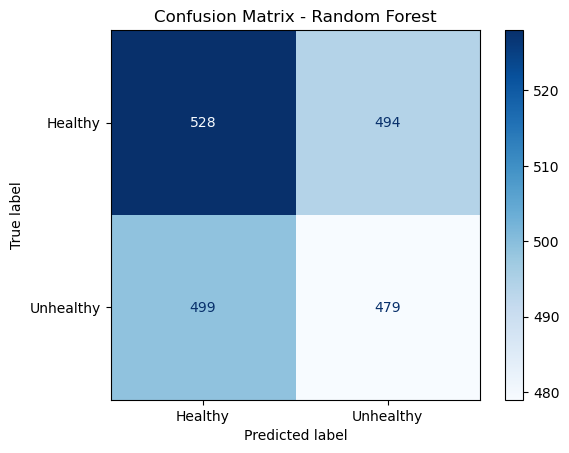

<Figure size 600x400 with 0 Axes>

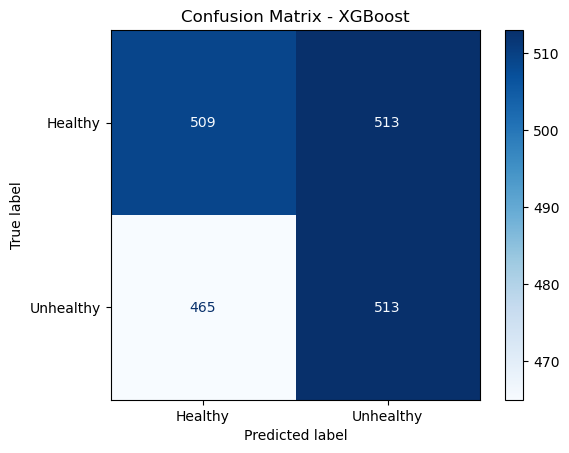

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

models = {"Random Forest": rf_model, "XGBoost": xgb_model}
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


### <i> Checking Model OverFitting </i>

🔹 Random Forest - Train Accuracy: 1.0000, Test Accuracy: 0.5035


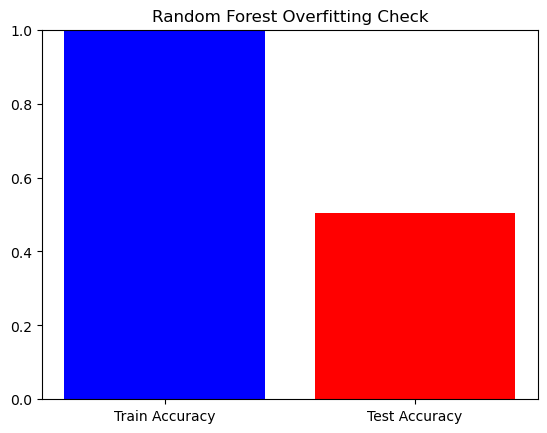

🔹 XGBoost - Train Accuracy: 0.8538, Test Accuracy: 0.5110


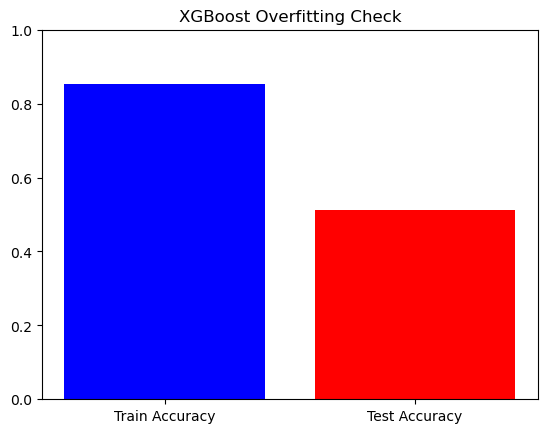

In [39]:
from sklearn.metrics import accuracy_score

# Get train and test accuracy for each model
for name, model in models.items():
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    
    print(f"🔹 {name} - Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    
    plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc], color=['blue', 'red'])
    plt.title(f"{name} Overfitting Check")
    plt.ylim(0, 1)
    plt.show()


### <i> Hyperparameter Tunning FOr XGb </i>

In [41]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)  # Suppresses info logs

import optuna
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data again (ensure reproducibility)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define objective function for Optuna
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=50),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 10),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 10),
    }
    
    # Train model
    model = xgb.XGBClassifier(**params, random_state=42, use_label_encoder=False, eval_metric="mlogloss")
    model.fit(X_train, y_train)

    # Validate model
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    
    return accuracy

# Run optimization
study = optuna.create_study(direction="maximize")  # Maximize accuracy
study.optimize(objective, n_trials=50)

# Print best parameters
print("Best Hyperparameters:", study.best_params)


Best Hyperparameters: {'n_estimators': 300, 'max_depth': 14, 'learning_rate': 0.04212276760557663, 'subsample': 0.9191140741681327, 'colsample_bytree': 0.5894334342431279, 'gamma': 0.6270679777698481, 'reg_alpha': 9.869872136939877, 'reg_lambda': 8.540330505723203}


In [42]:
# Train final XGBoost model with best parameters
best_params = study.best_params
best_model = xgb.XGBClassifier(**best_params, random_state=42, use_label_encoder=False, eval_metric="mlogloss")
best_model.fit(X_train, y_train)

# Evaluate performance
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"✅ Final XGBoost - Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")


✅ Final XGBoost - Train Accuracy: 0.9066, Test Accuracy: 0.8180


### <i> Hyperparameter Tunning for Random Forest Classifier </i>

In [44]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split data again (ensure reproducibility)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define Optuna objective function
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500, step=50),
        "max_depth": trial.suggest_int("max_depth", 5, 30),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2"]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False])
    }

    # Train model
    model = RandomForestClassifier(**params, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)

    # Validate model
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    return accuracy

# Run Optuna optimization
study = optuna.create_study(direction="maximize")  # Maximize accuracy
study.optimize(objective, n_trials=50)

# Print best hyperparameters
print("Best Hyperparameters:", study.best_params)


Best Hyperparameters: {'n_estimators': 100, 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': True}


In [45]:
# Train final Random Forest model with best parameters
best_params = study.best_params
best_rf_model = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
best_rf_model.fit(X_train, y_train)

# Evaluate performance
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"✅ Final Random Forest - Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")


✅ Final Random Forest - Train Accuracy: 0.7256, Test Accuracy: 0.6810


### <i> Feature Importance For Hyperparameter Tunning </i>

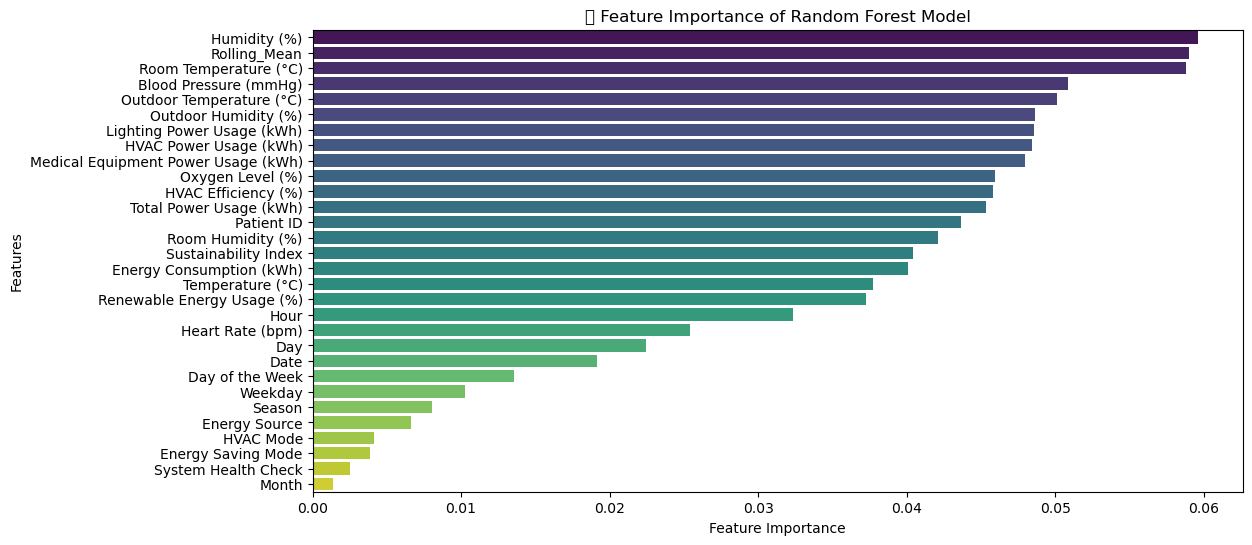

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get feature importance
importances = best_rf_model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(importances)[::-1]  # Sort in descending order

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[sorted_idx], y=np.array(feature_names)[sorted_idx], palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("🔹 Feature Importance of Random Forest Model")
plt.show()


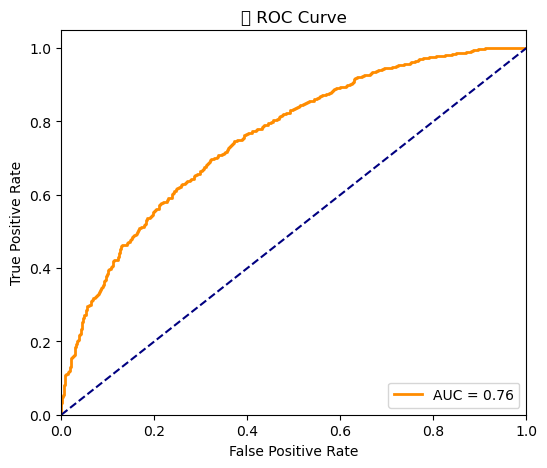

In [48]:
from sklearn.metrics import roc_curve, auc

# Get probabilities for positive class
y_probs = best_rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("🔹 ROC Curve")
plt.legend(loc="lower right")
plt.show()
